Based on notes in this notebook, I have change scaling the data by using MinMax Scaler in future notebooks, which improved model significantly.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.head()

,Opening,High,Low,Closing,Momentum,Range,ohlc
0,2.879833,2.8879,2.8701,2.879821,0.000011,0.0178,2.879414
1,2.884751,2.8941,2.8741,2.884744,0.000007,0.0200,2.884424
2,2.922487,2.9499,2.8787,2.922526,-0.000040,0.0712,2.918403
3,2.924881,2.9462,2.9071,2.924866,0.000015,0.0391,2.925762
4,2.889930,2.9105,2.8762,2.889919,0.000011,0.0343,2.891637


In [ ]:
df.pop('Momentum')
df.pop('Range')
df.pop('ohlc')

0       2.879414
1       2.884424
2       2.918403
3       2.925762
4       2.891637
          ...   
3537    4.293774
3538    4.273808
3539    4.284615
3540    4.223919
3541    4.172130
Name: ohlc, Length: 3542, dtype: float64

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')

#X_std = (float_data - float_data.min(axis=0)) / (float_data.max(axis=0) - float_data.min(axis=0))
#X_scaled = X_std * (max - min) + min
#float_data['Momentum']
mean = float_data[:2501].mean(axis=0)
std = float_data[:2501].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
lookback = 20
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3]
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2501,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3001 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.05,
  recurrent_dropout=0.05,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(11,
  activation='softmax',))
model.add(layers.Dense(1))
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=600,
  epochs=160,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/160
600/600 [==============================] - 54s 86ms/step - loss: 0.7773 - val_loss: 0.6155
Epoch 2/160
600/600 [==============================] - 52s 87ms/step - loss: 0.2930 - val_loss: 0.1160
Epoch 3/160
600/600 [==============================] - 51s 86ms/step - loss: 0.1166 - val_loss: 0.1451
Epoch 4/160
600/600 [==============================] - 51s 85ms/step - loss: 0.0826 - val_loss: 0.1004
Epoch 5/160
600/600 [==============================] - 51s 86ms/step - loss: 0.0758 - val_loss: 0.1290
Epoch 6/160
600/600 [==============================] - 51s 86ms/step - loss: 0.0725 - val_loss: 0.1171
Epoch 7/160
600/600 [==============================] - 51s 85ms/step - loss: 0.0712 - val_loss: 0.1186
Epoch 8/160
600/600 [==============================] - 51s 86ms/step - loss: 0.0693 - val_loss: 0.1400
Epoch 9/160
600/600 [==============================] - 51s 85ms/step - loss: 0.0690 - val_loss: 0.1309
Epoch 10/160
600/600 [==============================] - 52s 86ms/step - l

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)
eval *std[3]

521/521 [==============================] - 9s 16ms/step - loss: 0.0742


0.027716615532226374

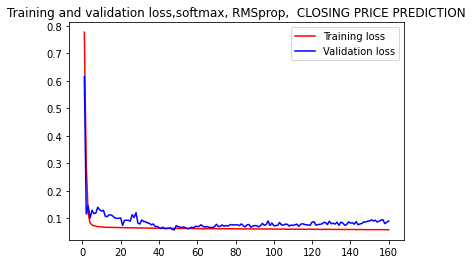

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
del model1

Try MinMax scaler <br>
Architecure beneath <br>


In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.LSTM(5,
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(1))
model2.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=200,
  epochs=500,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/500
200/200 [==============================] - 9s 31ms/step - loss: 0.3853 - val_loss: 0.0743
Epoch 2/500
200/200 [==============================] - 6s 29ms/step - loss: 0.1289 - val_loss: 0.0700
Epoch 3/500
200/200 [==============================] - 6s 30ms/step - loss: 0.1071 - val_loss: 0.0597
Epoch 4/500
200/200 [==============================] - 6s 30ms/step - loss: 0.1023 - val_loss: 0.0583
Epoch 5/500
200/200 [==============================] - 6s 32ms/step - loss: 0.0990 - val_loss: 0.0568
Epoch 6/500
200/200 [==============================] - 6s 30ms/step - loss: 0.0961 - val_loss: 0.0562
Epoch 7/500
200/200 [==============================] - 7s 35ms/step - loss: 0.0924 - val_loss: 0.0582
Epoch 8/500
200/200 [==============================] - 6s 29ms/step - loss: 0.0910 - val_loss: 0.0537
Epoch 9/500
200/200 [==============================] - 6s 29ms/step - loss: 0.0894 - val_loss: 0.0626
Epoch 10/500
200/200 [==============================] - 6s 30ms/step - loss: 0.087

In [ ]:
eval2 = model2.evaluate(test_gen, steps = test_steps)
eval2 *std[3]

521/521 [==============================] - 3s 6ms/step - loss: 0.0734


0.02740415069869906

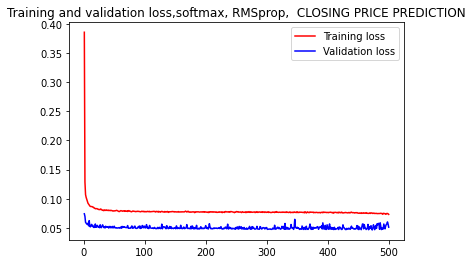

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Now previous, but with other features (momentum, cpi..) with lower number of epochs, as model does not improve

Test model with other loss functions

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(64,
  activation='softmax',))
model.add(layers.Dense(1))
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.01), loss='huber', metrics=['mae'])
history = model.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 46s 108ms/step - loss: 0.0703 - mae: 0.2202 - val_loss: 0.0036 - val_mae: 0.0660
Epoch 2/200
400/400 [==============================] - 43s 108ms/step - loss: 0.0059 - mae: 0.0842 - val_loss: 0.0029 - val_mae: 0.0605
Epoch 3/200
400/400 [==============================] - 44s 110ms/step - loss: 0.0056 - mae: 0.0818 - val_loss: 0.0055 - val_mae: 0.0860
Epoch 4/200
400/400 [==============================] - 43s 109ms/step - loss: 0.0053 - mae: 0.0799 - val_loss: 0.0056 - val_mae: 0.0881
Epoch 5/200
400/400 [==============================] - 46s 116ms/step - loss: 0.0052 - mae: 0.0788 - val_loss: 0.0069 - val_mae: 0.0977
Epoch 6/200
135/400 [=========>....................] - ETA: 23s - loss: 0.0052 - mae: 0.0791

KeyboardInterrupt: ignored

In [ ]:
del model